In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
` seaborn as sns

In [2]:
pd.pandas.set_option("display.max_columns",None)

In [3]:
# read the file and create a pandas dataframe
df = pd.read_csv("diabetic_data.csv")

In [4]:
# check the dimensions of the data
(df.shape)

(101766, 50)

In [5]:
#corelation_matrix=df.corr()

In [6]:
#corelation_matrix['readmitted'].sort_values()[-15:]

In [7]:
df.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [8]:
df.nunique()

encounter_id                101766
patient_nbr                  71518
race                             6
gender                           3
age                             10
weight                          10
admission_type_id                8
discharge_disposition_id        26
admission_source_id             17
time_in_hospital                14
payer_code                      18
medical_specialty               73
num_lab_procedures             118
num_procedures                   7
num_medications                 75
number_outpatient               39
number_emergency                33
number_inpatient                21
diag_1                         717
diag_2                         749
diag_3                         790
number_diagnoses                16
max_glu_serum                    4
A1Cresult                        4
metformin                        4
repaglinide                      4
nateglinide                      4
chlorpropamide                   4
glimepiride         

In [57]:
num_fet = [x for x in df.columns if df[x].dtypes != 'O']
print ("Number of numerical variable: ", len(num_fet))

Number of numerical variable:  95


In [10]:
cat_fet = [x for x in df.columns if df[x].dtypes =='O']
print ("Number of categorical variable: ", len(cat_fet))


Number of categorical variable:  37


In [11]:
df.drop(['encounter_id', 'patient_nbr', 'payer_code'], axis=1, inplace=True)
df.drop(['weight', 'medical_specialty'], axis=1, inplace=True)
df.drop(['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 
           'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 
           'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 
           'citoglipton', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone',
           'metformin-rosiglitazone', 'metformin-pioglitazone'], axis=1, inplace=True)
df.drop(['diag_1','diag_2', 'diag_3'], axis=1, inplace=True)

In [12]:
df.groupby('readmitted').size()

readmitted
<30    11357
>30    35545
NO     54864
dtype: int64

Text(0, 0.5, 'Count')

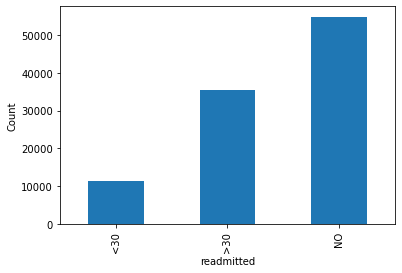

In [13]:
# the response variable 'readmitted' in the original dataset contains three categories.
# 11% of patients were readmitted within 30 days (<30)
# 35% of patients were readmitted after 30 days (>30)
# 54% of patients were never readmitted (NO)
df.groupby('readmitted').size().plot(kind='bar')
plt.ylabel('Count')

In [14]:
# recode the response variable so that it becomes a binary classification task.
# '0' means no readmission
# '1' means readmission no matter how many days after being discharged
df['readmitted'] = pd.Series([0 if val == 'NO' else 1 for val in df['readmitted']])
df_origin = df

Text(0, 0.5, 'Count')

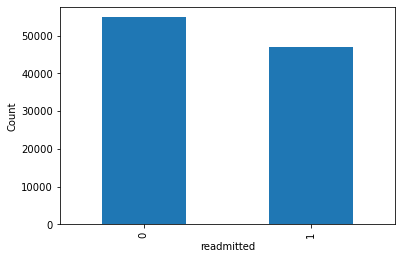

In [15]:
# plot 'readmitted' again to see the change
df.groupby('readmitted').size().plot(kind='bar')
plt.ylabel('Count')

In [16]:
df.head(50)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,insulin,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,1,None,None,No,No,No,0
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,9,None,None,Up,Ch,Yes,1
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,6,None,None,No,No,Yes,0
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,7,None,None,Up,Ch,Yes,0
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,5,None,None,Steady,Ch,Yes,0
5,Caucasian,Male,[50-60),2,1,2,3,31,6,16,0,0,0,9,None,None,Steady,No,Yes,1
6,Caucasian,Male,[60-70),3,1,2,4,70,1,21,0,0,0,7,None,None,Steady,Ch,Yes,0
7,Caucasian,Male,[70-80),1,1,7,5,73,0,12,0,0,0,8,None,None,No,No,Yes,1
8,Caucasian,Female,[80-90),2,1,4,13,68,2,28,0,0,0,8,None,None,Steady,Ch,Yes,0
9,Caucasian,Female,[90-100),3,3,4,12,33,3,18,0,0,0,8,None,None,Steady,Ch,Yes,0


In [17]:
df =df.replace('?',np.nan)

In [18]:
df['race']= df['race'].fillna('UNK')

In [19]:
values = { "diabetesMed":{'Yes': 1,"No":0}}
df =df.replace(values)
values = { "change":{'Ch': 1,"No":0}}
df =df.replace(values)


In [20]:
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,insulin,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,1,None,None,No,0,0,0
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,9,None,None,Up,1,1,1
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,6,None,None,No,0,1,0
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,7,None,None,Up,1,1,0
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,5,None,None,Steady,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),1,3,7,3,51,0,16,0,0,0,9,None,>8,Down,1,1,1
101762,AfricanAmerican,Female,[80-90),1,4,5,5,33,3,18,0,0,1,9,None,None,Steady,0,1,0
101763,Caucasian,Male,[70-80),1,1,7,1,53,0,9,1,0,0,13,None,None,Down,1,1,0
101764,Caucasian,Female,[80-90),2,3,7,10,45,2,21,0,0,1,9,None,None,Up,1,1,0


In [21]:
df= pd.get_dummies(df,columns = ['age'])

In [22]:
df= pd.get_dummies(df,columns=['race'])
df = pd.get_dummies(df,columns=['gender'])
df = pd.get_dummies(df,columns=['max_glu_serum'])
df = pd.get_dummies(df,columns=['A1Cresult'])
df = pd.get_dummies(df,columns=['insulin'])
df = pd.get_dummies(df,columns=['change'])
df = pd.get_dummies(df,columns=['diabetesMed'])
df = pd.get_dummies(df,columns=['discharge_disposition_id'])
df = pd.get_dummies(df,columns=['admission_source_id'])
df= pd.get_dummies(df,columns=['admission_type_id'])

In [23]:
df

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,race_UNK,gender_Female,gender_Male,gender_Unknown/Invalid,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>7,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,insulin_Down,insulin_No,insulin_Steady,insulin_Up,change_0,change_1,diabetesMed_0,diabetesMed_1,discharge_disposition_id_1,discharge_disposition_id_2,discharge_disposition_id_3,discharge_disposition_id_4,discharge_disposition_id_5,discharge_disposition_id_6,discharge_disposition_id_7,discharge_disposition_id_8,discharge_disposition_id_9,discharge_disposition_id_10,discharge_disposition_id_11,discharge_disposition_id_12,discharge_disposition_id_13,discharge_disposition_id_14,discharge_disposition_id_15,discharge_disposition_id_16,discharge_disposition_id_17,discharge_disposition_id_18,discharge_disposition_id_19,discharge_disposition_id_20,discharge_disposition_id_22,discharge_disposition_id_23,discharge_disposition_id_24,discharge_disposition_id_25,discharge_disposition_id_27,discharge_disposition_id_28,admission_source_id_1,admission_source_id_2,admission_source_id_3,admission_source_id_4,admission_source_id_5,admission_source_id_6,admission_source_id_7,admission_source_id_8,admission_source_id_9,admission_source_id_10,admission_source_id_11,admission_source_id_13,admission_source_id_14,admission_source_id_17,admission_source_id_20,admission_source_id_22,admission_source_id_25,admission_type_id_1,admission_type_id_2,admission_type_id_3,admission_type_id_4,admission_type_id_5,admission_type_id_6,admission_type_id_7,admission_type_id_8
0,1,41,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,3,59,0,18,0,0,0,9,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,2,11,5,13,2,0,1,6,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,2,44,1,16,0,0,0,7,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,51,0,8,0,0,0,5,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,3,51,0,16,0,0,0,9,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
101762,5,33,3,18,0,0,1,9,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
101763,1,53,0,9,1,0,0,13,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
101764,10,45,2,21,0,0,1,9,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,

In [24]:
feature_scale_cols = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 
                      'number_diagnoses', 'number_inpatient', 'number_emergency', 'number_outpatient']

In [25]:
feature_scale_cols

['time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_diagnoses',
 'number_inpatient',
 'number_emergency',
 'number_outpatient']

In [26]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(df[feature_scale_cols])
data_scaler = scaler.transform(df[feature_scale_cols])

In [27]:
data_scaler_df = pd.DataFrame(data=data_scaler, columns=feature_scale_cols, index=df.index)

In [59]:
df.drop(feature_scale_cols, axis=1, inplace=True)
df = pd.concat([df, data_scaler_df], axis=1)

In [31]:
df

,readmitted,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,race_UNK,gender_Female,gender_Male,gender_Unknown/Invalid,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>7,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,insulin_Down,insulin_No,insulin_Steady,insulin_Up,change_0,change_1,diabetesMed_0,diabetesMed_1,discharge_disposition_id_1,discharge_disposition_id_2,discharge_disposition_id_3,discharge_disposition_id_4,discharge_disposition_id_5,discharge_disposition_id_6,discharge_disposition_id_7,discharge_disposition_id_8,discharge_disposition_id_9,discharge_disposition_id_10,discharge_disposition_id_11,discharge_disposition_id_12,discharge_disposition_id_13,discharge_disposition_id_14,discharge_disposition_id_15,discharge_disposition_id_16,discharge_disposition_id_17,discharge_disposition_id_18,discharge_disposition_id_19,discharge_disposition_id_20,discharge_disposition_id_22,discharge_disposition_id_23,discharge_disposition_id_24,discharge_disposition_id_25,discharge_disposition_id_27,discharge_disposition_id_28,admission_source_id_1,admission_source_id_2,admission_source_id_3,admission_source_id_4,admission_source_id_5,admission_source_id_6,admission_source_id_7,admission_source_id_8,admission_source_id_9,admission_source_id_10,admission_source_id_11,admission_source_id_13,admission_source_id_14,admission_source_id_17,admission_source_id_20,admission_source_id_22,admission_source_id_25,admission_type_id_1,admission_type_id_2,admission_type_id_3,admission_type_id_4,admission_type_id_5,admission_type_id_6,admission_type_id_7,admission_type_id_8,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,number_inpatient,number_emergency,number_outpatient
0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-1.137649,-0.106517,-0.785398,-1.848268,-3.321596,-0.503276,-0.21262,-0.291461
1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,-0.467653,0.808384,-0.785398,0.243390,0.815784,-0.503276,-0.21262,-0.291461
2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,-0.802651,-1.631351,2.145781,-0.371804,-0.735733,0.288579,-0.21262,1.286748
3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,-0.802651,0.045967,-0.199162,-0.002688,-0.218561,-0.503276,-0.21262,-0.291461
4,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,-1.137649,0.401761,-0.785398,-0.986997,-1.252906,-0.503276,-0.21262,-0.291461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,-0.467653,0.401761,-0.785398,-0.002688,0.815784,-0.503276,-0.21262,-0.291461
101762,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.202343,-0.513139,0.97

In [32]:
x = df.drop(['readmitted'], axis =1)
y = df['readmitted'].values

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state =123456543)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

In [36]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

D:\python\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
y_pred =classifier.predict(x_test)

In [38]:
y_pred=pd.DataFrame(y_pred)

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
L= print(classifier.score(x_test,y_test))

0.6307359732730667


In [40]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators= 3)
classifier.fit(x_train,y_train)

RandomForestClassifier(n_estimators=3)

In [41]:
y_pred = classifier.predict(x_test)

In [42]:
y_pred

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
R=print(classifier.score(x_test,y_test))

0.5800334086666011


In [44]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [45]:
y_pred = classifier.predict(x_test)

In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
D=print(classifier.score(x_test,y_test))

0.556598211653729


In [47]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors =18)
classifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=18)

In [48]:
y_pred = classifier.predict(x_test)

In [49]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
K=print(classifier.score(x_test,y_test))

0.6051390390095313


In [50]:
accuracy=[]
for k in range(1,21):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(x_train,y_train)
    accuracy.append(classifier.score(x_test,y_test))

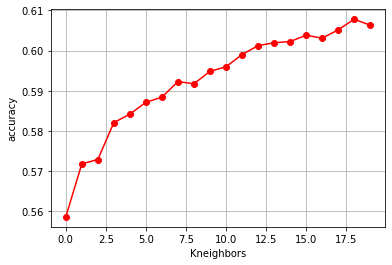

In [51]:
plt.plot(accuracy,marker ='o',color ='r')
plt.xlabel('Kneighbors')
plt.ylabel("accuracy")
plt.grid(True)
plt.show()

In [52]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
max_features_range = np.arange(1,6,1)
n_estimators_range = np.arange(10,210,10)
param_distributions = dict(max_features=max_features_range, n_estimators=n_estimators_range)
rf = RandomForestClassifier()
random = RandomizedSearchCV(estimator=rf, param_distributions=param_distributions, n_iter=2)
random.fit(x_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=2,
                   param_distributions={'max_features': array([1, 2, 3, 4, 5]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200])})

In [53]:
print("The best parameters are %s with a score of %0.2f"
      % (random.best_params_, random.best_score_))

The best parameters are {'n_estimators': 200, 'max_features': 3} with a score of 0.62


In [54]:
import pandas as pd
random_results = pd.concat([pd.DataFrame(random.cv_results_["params"]),
                            pd.DataFrame(random.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
random_results.head()

,n_estimators,max_features,Accuracy
0,150,3,0.621886
1,200,3,0.621935


In [55]:
random_contour = random_results.groupby(['max_features','n_estimators']).mean()
random_contour

Accuracy
max_features n_estimators          
3            150           0.621886
             200           0.621935

In [56]:
random_reset = random_contour.reset_index()
random_reset.columns = ['max_features', 'n_estimators', 'Accuracy']
random_pivot = random_reset.pivot('max_features', 'n_estimators')
random_pivot

Accuracy          
n_estimators       150       200
max_features                    
3             0.621886  0.621935